In [ ]:
#pip install numpy matplotlib scipy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Generate a normal distribution with sample of an experiment

Sample of people and measure their heights. Re run the code...also the average is changing.

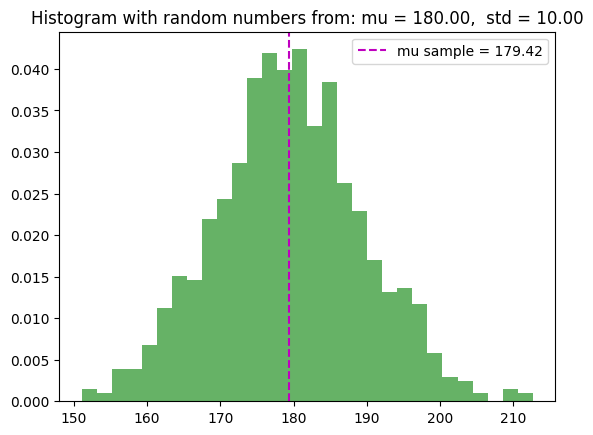

In [7]:
# Generate 1000 random numbers from a normal distribution
mu, sigma = 180, 10  # mean and standard deviation
data = np.random.normal(mu, sigma, 1000)
mean_sample = data.mean().item()
# Create a histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
title = "Histogram with random numbers from: mu = %.2f,  std = %.2f" % (mu, sigma)
plt.axvline(x=mean_sample , color='m', linestyle='--', label='mu sample = %.2f' % (mean_sample))
plt.legend()
plt.title(title)
plt.show()

As we can see, it seems to be appropriate, to approx this with the normal distribution

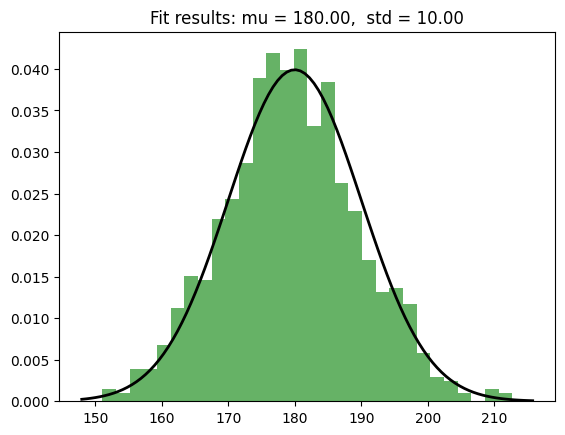

In [8]:
# Show the approximation with the normal distribution
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, sigma)
plt.title(title)
plt.show()

Generate the distribution for mu_sample

Now we don't are interested in the height of the person, now we are looking the average. So we multiple generate samples of people and then we are calculating the average. Also teh average should be normal distrubited. Re run the code at above.

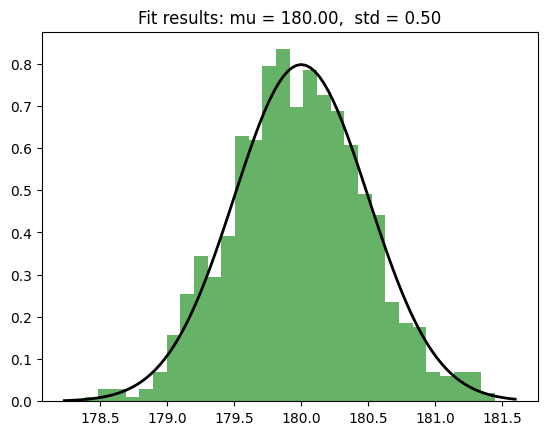

In [9]:
# Show the approximation with the normal distribution
mu, sigma = 180, 0.5  # mean and standard deviation
data = np.random.normal(mu, sigma, 1000)
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, sigma)
plt.title(title)
plt.show()

Generate the distribution of mu_sample and theoretical distribtion

 <h1>Now one-way t-test</h1>
    <p>We are assuming that the average height in the population is 178 cm, for example, in a sample from 1990. We want to prove that nowadays people are getting taller.</p>
    <p><strong>H<sub>0</sub></strong> = 178 cm and <strong>H<sub>A</sub></strong> > 178 cm</p>
    <p>So we have a one-sided test.</p>

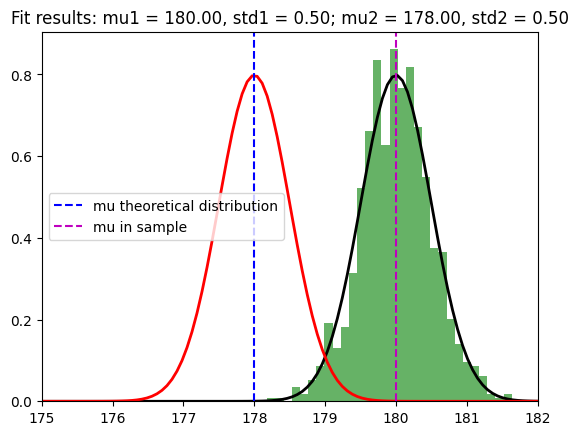

In [17]:
# Generate 1000 random numbers from the first normal distribution
mu1, sigma1 = 180, 0.5  # mean and standard deviation for the first normal distribution
data = np.random.normal(mu1, sigma1, 1000)

# Create a histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# Add a graph of the first normal distribution used to generate the data
xmin, xmax = 175, 182
x = np.linspace(xmin, xmax, 100)
p1 = stats.norm.pdf(x, mu1, sigma1)
plt.plot(x, p1, 'k', linewidth=2)

# Add a graph of the second normal distribution with mu = 1 and sigma = 0.4
mu2, sigma2 = 178, 0.5
p2 = stats.norm.pdf(x, mu2, sigma2)
plt.plot(x, p2, 'r', linewidth=2)

# Add vertical lines at x = 1 and x = 3 with labels
plt.axvline(x=178, color='b', linestyle='--', label='mu theoretical distribution')
plt.axvline(x=180, color='m', linestyle='--', label='mu in sample')

title = "Fit results: mu1 = %.2f, std1 = %.2f; mu2 = %.2f, std2 = %.2f" % (mu1, sigma1, mu2, sigma2)
plt.title(title)
plt.xlim(xmin, xmax)
plt.legend()

# Show the plot
plt.show()

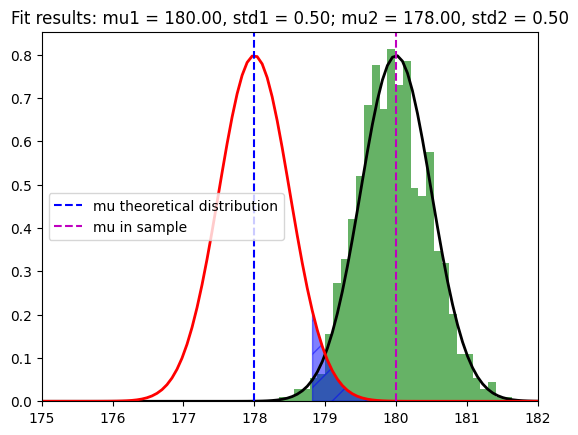

In [21]:
# Generate 1000 random numbers from the first normal distribution
mu1, sigma1 = 180, 0.5  # mean and standard deviation for the first normal distribution
data = np.random.normal(mu1, sigma1, 1000)

# Create a histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# Add a graph of the first normal distribution used to generate the data
xmin, xmax = 175, 182
x = np.linspace(xmin, xmax, 100)
p1 = stats.norm.pdf(x, mu1, sigma1)
plt.plot(x, p1, 'k', linewidth=2)

# Add a graph of the second normal distribution with mu = 1 and sigma = 0.4
mu2, sigma2 = 178, 0.5
p2 = stats.norm.pdf(x, mu2, sigma2)
plt.plot(x, p2, 'r', linewidth=2)

# Add vertical lines at x = 1 and x = 3 with labels
plt.axvline(x=178, color='b', linestyle='--', label='mu theoretical distribution')
plt.axvline(x=180, color='m', linestyle='--', label='mu in sample')

# Calculate the 95% quantile for the second normal distribution
quantile_95 = stats.norm.ppf(0.95, mu2, sigma2)

# Plot the hatched area under the red curve for the 95% quantile and above
x_fill = np.linspace(quantile_95, xmax, 100)
p_fill = stats.norm.pdf(x_fill, mu2, sigma2)
plt.fill_between(x_fill, p_fill, color='blue', alpha=0.5, hatch='/')

title = "Fit results: mu1 = %.2f, std1 = %.2f; mu2 = %.2f, std2 = %.2f" % (mu1, sigma1, mu2, sigma2)
plt.title(title)
plt.xlim(xmin, xmax)
plt.legend()

# Show the plot
plt.show()

In [22]:
# Define the parameters for the two normal distributions
mu1, sigma1 = 180, 0.5  # mean and standard deviation for the first normal distribution
mu2, sigma2 = 178, 0.5  # mean and standard deviation for the second normal distribution

# Perform a t-test to compare the means of the two theoretical distributions
# Since we don't have samples, we use the means and standard deviations directly
# Calculate the t-statistic and p-value manually
n1 = n2 = 1000  # sample sizes (assuming large sample sizes for theoretical distributions)
se = ((sigma1**2 / n1) + (sigma2**2 / n2))**0.5  # standard error
t_statistic = (mu1 - mu2) / se  # t-statistic
df = n1 + n2 - 2  # degrees of freedom
p_value = stats.t.sf(abs(t_statistic), df) * 2  # two-tailed p-value

# Print the t-test result
print(f"T-statistic: {t_statistic}, P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("The means of the two theoretical distributions are statistically different (reject H0).")
else:
    print("The means of the two theoretical distributions are not statistically different (fail to reject H0).")

T-statistic: 89.44271909999159, P-value: 0.0
The means of the two theoretical distributions are statistically different (reject H0).


Now with narrowed mu and alpha error

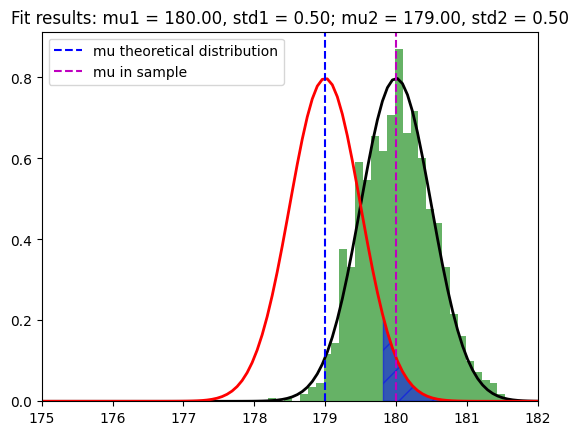

In [23]:
# Generate 1000 random numbers from the first normal distribution
mu1, sigma1 = 180, 0.5  # mean and standard deviation for the first normal distribution
data = np.random.normal(mu1, sigma1, 1000)

# Create a histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# Add a graph of the first normal distribution used to generate the data
xmin, xmax = 175, 182
x = np.linspace(xmin, xmax, 100)
p1 = stats.norm.pdf(x, mu1, sigma1)
plt.plot(x, p1, 'k', linewidth=2)

# Add a graph of the second normal distribution with mu = 1 and sigma = 0.4
mu2, sigma2 = 179, 0.5
p2 = stats.norm.pdf(x, mu2, sigma2)
plt.plot(x, p2, 'r', linewidth=2)

# Add vertical lines at x = 1 and x = 3 with labels
plt.axvline(x=mu2, color='b', linestyle='--', label='mu theoretical distribution')
plt.axvline(x=mu1, color='m', linestyle='--', label='mu in sample')

# Calculate the 95% quantile for the second normal distribution
quantile_95 = stats.norm.ppf(0.95, mu2, sigma2)

# Plot the hatched area under the red curve for the 95% quantile and above
x_fill = np.linspace(quantile_95, xmax, 100)
p_fill = stats.norm.pdf(x_fill, mu2, sigma2)
plt.fill_between(x_fill, p_fill, color='blue', alpha=0.5, hatch='/')

title = "Fit results: mu1 = %.2f, std1 = %.2f; mu2 = %.2f, std2 = %.2f" % (mu1, sigma1, mu2, sigma2)
plt.title(title)
plt.xlim(xmin, xmax)
plt.legend()

# Show the plot
plt.show()

In [24]:
# Define the parameters for the two normal distributions
mu1, sigma1 = 180, 0.5  # mean and standard deviation for the first normal distribution
mu2, sigma2 = 179, 0.5  # mean and standard deviation for the second normal distribution

# Perform a t-test to compare the means of the two theoretical distributions
# Since we don't have samples, we use the means and standard deviations directly
# Calculate the t-statistic and p-value manually
n1 = n2 = 1000  # sample sizes (assuming large sample sizes for theoretical distributions)
se = ((sigma1**2 / n1) + (sigma2**2 / n2))**0.5  # standard error
t_statistic = (mu1 - mu2) / se  # t-statistic
df = n1 + n2 - 2  # degrees of freedom
p_value = stats.t.sf(abs(t_statistic), df) * 2  # two-tailed p-value

# Print the t-test result
print(f"T-statistic: {t_statistic}, P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("The means of the two theoretical distributions are statistically different (reject H0).")
else:
    print("The means of the two theoretical distributions are not statistically different (fail to reject H0).")

T-statistic: 44.721359549995796, P-value: 2.8557430532137358e-303
The means of the two theoretical distributions are statistically different (reject H0).


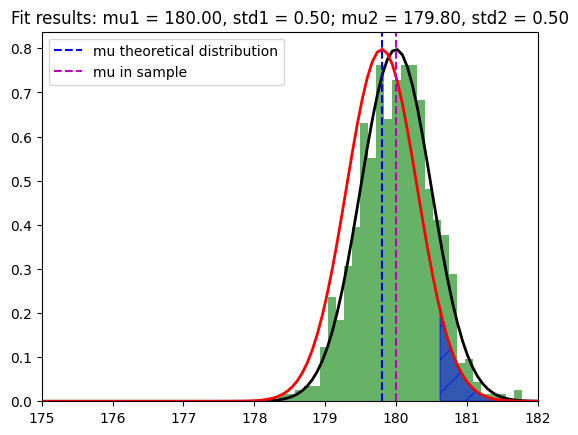

In [25]:
# Generate 1000 random numbers from the first normal distribution
mu1, sigma1 = 180, 0.5  # mean and standard deviation for the first normal distribution
data = np.random.normal(mu1, sigma1, 1000)

# Create a histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# Add a graph of the first normal distribution used to generate the data
xmin, xmax = 175, 182
x = np.linspace(xmin, xmax, 100)
p1 = stats.norm.pdf(x, mu1, sigma1)
plt.plot(x, p1, 'k', linewidth=2)

# Add a graph of the second normal distribution with mu = 1 and sigma = 0.4
mu2, sigma2 = 179.8, 0.5
p2 = stats.norm.pdf(x, mu2, sigma2)
plt.plot(x, p2, 'r', linewidth=2)

# Add vertical lines at x = 1 and x = 3 with labels
plt.axvline(x=mu2, color='b', linestyle='--', label='mu theoretical distribution')
plt.axvline(x=mu1, color='m', linestyle='--', label='mu in sample')

# Calculate the 95% quantile for the second normal distribution
quantile_95 = stats.norm.ppf(0.95, mu2, sigma2)

# Plot the hatched area under the red curve for the 95% quantile and above
x_fill = np.linspace(quantile_95, xmax, 100)
p_fill = stats.norm.pdf(x_fill, mu2, sigma2)
plt.fill_between(x_fill, p_fill, color='blue', alpha=0.5, hatch='/')

title = "Fit results: mu1 = %.2f, std1 = %.2f; mu2 = %.2f, std2 = %.2f" % (mu1, sigma1, mu2, sigma2)
plt.title(title)
plt.xlim(xmin, xmax)
plt.legend()

# Show the plot
plt.show()

In [29]:
# Define the parameters for the two normal distributions
mu1, sigma1 = 180, 0.5  # mean and standard deviation for the first normal distribution
mu2, sigma2 = 179.8, 0.5  # mean and standard deviation for the second normal distribution

# Perform a t-test to compare the means of the two theoretical distributions
# Since we don't have samples, we use the means and standard deviations directly
# Calculate the t-statistic and p-value manually
n1 = n2 = 1000  # sample sizes (assuming large sample sizes for theoretical distributions)
se = ((sigma1**2 / n1) + (sigma2**2 / n2))**0.5  # standard error
t_statistic = (mu1 - mu2) / se  # t-statistic
df = n1 + n2 - 2  # degrees of freedom
p_value = stats.t.sf(abs(t_statistic), df) * 2  # two-tailed p-value

# Print the t-test result
print(f"T-statistic: {t_statistic}, P-value: {p_value}")

# Interpret the result
alpha = 5e-20
if p_value < alpha:
    print("The means of the two theoretical distributions are statistically different (reject H0).")
else:
    print("The means of the two theoretical distributions are not statistically different (fail to reject H0).")

T-statistic: 8.944271909998651, P-value: 8.328998310440721e-19
The means of the two theoretical distributions are not statistically different (fail to reject H0).
